In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
dengue_dataset = pd.read_csv('/content/dengue.csv')

In [ ]:
# printing the first 5 rows of the dataset
dengue_dataset.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


In [ ]:
# number of rows and Columns in this dataset
dengue_dataset.shape

(602, 26)

In [ ]:
# getting the statistical measures of the data
dengue_dataset.describe()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,300.500000,31.918079,24.588318,27.813181,38.476069,25.613154,31.485111,23.984349,81.254786,13.120862,...,191.498693,1004.690531,59.701192,3.632620,199.802695,17.251785,6.877674,1.827725,0.859734,8502.342193
std,173.926709,2.737215,2.727919,2.412416,4.776400,4.178797,4.672951,2.668014,9.406354,28.463365,...,81.604668,41.364967,20.832639,1.890352,54.128192,4.676051,1.763928,1.237389,0.973575,6780.749627
min,0.000000,25.000000,12.740000,18.820000,25.000000,12.360000,18.626667,4.480000,40.833333,0.000000,...,0.500000,0.000000,0.000000,0.800000,57.900000,5.000000,2.000000,0.000000,0.000000,52.000000
25%,150.250000,30.025000,23.200000,26.500000,35.600000,23.200000,28.100000,23.300000,75.800000,0.000000,...,134.425000,1002.025000,47.400000,2.523780,160.350000,13.900000,6.000000,1.000000,0.000000,3017.750000
50%,300.500000,31.700000,25.000000,27.900000,38.400000,25.000000,31.500000,24.529268,82.800000,3.000000,...,207.300000,1007.000000,63.700000,3.200000,205.750000,17.750000,7.000000,2.000000,1.000000,7490.000000
75%,450.750000,33.600000,26.500000,29.448171,41.900000,26.600000,34.875000,25.475000,88.175000,12.589000,...,252.375000,1010.185772,73.200000,4.300000,238.800610,20.600610,8.000000,3.000000,1.000000,12702.500000
max,601.000000,41.200000,29.400000,33.300000,49.600000,37.900000,42.900000,28.100000,99.300000,302.000000,...,359.200000,1020.000000,97.900000,24.033333,318.500000,27.700000,10.000000,4.000000,5.000000,24983.000000


In [ ]:
dengue_dataset['labels'].unique().tolist()

['normal']

In [ ]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):
  for c in df.columns:
    if df[c].dtype=='object':
      df[c] = df[c].fillna('N')
      lbl = LabelEncoder()
      lbl.fit(list(df[c].values))
      df[c] = lbl.transform(df[c].values)
      return df

In [ ]:
data=dengue_dataset.copy()

Target Setting

In [ ]:
target=['cases']
Y=data[target]
X=data.drop(target+['labels','serial'],axis=1)

Standardize features

In [ ]:
scaler = StandardScaler()
dataXar = scaler.fit_transform(X)
dataX2=pd.DataFrame(dataXar)
dataX2.columns=X.columns.tolist()
display(dataX2)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations
0,0.780665,-0.040444,0.372004,0.268572,-0.070736,0.175879,-0.380043,-0.824231,-0.358623,-0.548731,...,-0.214115,-0.195045,0.077939,-0.430128,0.083251,0.153377,0.154514,0.201538,0.591396,0.346976
1,0.792741,0.405771,0.684965,0.599724,0.605341,0.629347,-0.187485,-0.977612,-0.328324,-0.654665,...,-0.337106,-0.406554,-0.027999,-0.547067,-0.396058,0.427551,0.426902,0.355407,-0.136844,0.135835
2,0.971102,0.304356,0.710936,0.416592,0.226811,0.342735,-0.526620,-1.258748,-0.353555,-0.797607,...,-0.292164,0.136410,0.025191,-0.196012,0.322778,0.547495,0.545925,0.539923,0.067006,0.319704
3,0.403024,0.180570,0.379380,-0.125307,0.138993,0.061521,-0.837392,-1.272243,-0.249498,-0.708268,...,-0.122000,-0.097551,-0.032208,-0.456061,-0.339670,0.473701,0.477017,0.406149,-0.426180,-0.733365
4,-0.459646,-0.131133,-0.430791,-0.395831,-0.323266,-0.544265,0.086385,0.574264,0.359206,0.596078,...,0.216967,0.398978,0.128365,-0.680216,0.134675,-0.429048,-0.425926,-0.391885,-0.695788,3.178036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0.139645,-0.069091,0.284939,-0.539781,-0.290553,-0.061064,-0.256715,-0.665506,-0.461357,-1.530185,...,-0.055675,-0.388765,0.101849,-0.446843,-0.281991,0.974374,0.994874,1.204182,-0.669485,0.144193
598,0.285901,0.664678,0.616832,-0.455967,0.188451,0.217364,-0.519300,-1.357103,-0.461357,-1.530185,...,-0.111399,0.508988,0.138141,-0.442039,-0.281991,0.793172,0.780840,0.636794,-0.669485,0.144193
599,0.395592,0.627990,0.824266,0.424088,0.164501,0.645715,-0.031641,-1.080464,-0.461357,-1.530185,...,0.156078,1.875242,0.147820,-1.402870,-0.281991,-0.083255,-0.075294,0.636794,-0.669485,0.144193
600,1.163433,0.811432,1.156159,0.926976,0.835108,0.774221,-0.256715,-1.633742,-0.461357,-1.530185,...,-0.323152,-1.351520,0.121205,-1.297178,-0.176103,-0.225628,-0.267924,0.069406,-0.669485,0.144193


In [ ]:
display(dataX2)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations
0,0.780665,-0.040444,0.372004,0.268572,-0.070736,0.175879,-0.380043,-0.824231,-0.358623,-0.548731,...,-0.214115,-0.195045,0.077939,-0.430128,0.083251,0.153377,0.154514,0.201538,0.591396,0.346976
1,0.792741,0.405771,0.684965,0.599724,0.605341,0.629347,-0.187485,-0.977612,-0.328324,-0.654665,...,-0.337106,-0.406554,-0.027999,-0.547067,-0.396058,0.427551,0.426902,0.355407,-0.136844,0.135835
2,0.971102,0.304356,0.710936,0.416592,0.226811,0.342735,-0.526620,-1.258748,-0.353555,-0.797607,...,-0.292164,0.136410,0.025191,-0.196012,0.322778,0.547495,0.545925,0.539923,0.067006,0.319704
3,0.403024,0.180570,0.379380,-0.125307,0.138993,0.061521,-0.837392,-1.272243,-0.249498,-0.708268,...,-0.122000,-0.097551,-0.032208,-0.456061,-0.339670,0.473701,0.477017,0.406149,-0.426180,-0.733365
4,-0.459646,-0.131133,-0.430791,-0.395831,-0.323266,-0.544265,0.086385,0.574264,0.359206,0.596078,...,0.216967,0.398978,0.128365,-0.680216,0.134675,-0.429048,-0.425926,-0.391885,-0.695788,3.178036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0.139645,-0.069091,0.284939,-0.539781,-0.290553,-0.061064,-0.256715,-0.665506,-0.461357,-1.530185,...,-0.055675,-0.388765,0.101849,-0.446843,-0.281991,0.974374,0.994874,1.204182,-0.669485,0.144193
598,0.285901,0.664678,0.616832,-0.455967,0.188451,0.217364,-0.519300,-1.357103,-0.461357,-1.530185,...,-0.111399,0.508988,0.138141,-0.442039,-0.281991,0.793172,0.780840,0.636794,-0.669485,0.144193
599,0.395592,0.627990,0.824266,0.424088,0.164501,0.645715,-0.031641,-1.080464,-0.461357,-1.530185,...,0.156078,1.875242,0.147820,-1.402870,-0.281991,-0.083255,-0.075294,0.636794,-0.669485,0.144193
600,1.163433,0.811432,1.156159,0.926976,0.835108,0.774221,-0.256715,-1.633742,-0.461357,-1.530185,...,-0.323152,-1.351520,0.121205,-1.297178,-0.176103,-0.225628,-0.267924,0.069406,-0.669485,0.144193


In [ ]:
df_columns = list(X.columns)
print(df_columns)

['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'stations']


In [ ]:
n=len(data)
train_X=dataX2.iloc[0:(n*3)//5]
train_Y=Y.iloc[0:(n*3)//5]
test_X=dataX2.iloc[(n*3)//5:]
test_Y=Y.iloc[(n*3)//5:]

In [ ]:
train_df=train_X
test_df=test_X

In [ ]:
train_df.columns=df_columns
test_df.columns=df_columns

Create Numeric Features

In [ ]:
def create_numeric_feature(input_df):
    use_columns = df_columns
    return input_df[use_columns].copy()

In [ ]:
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

Convert Features

In [ ]:
from tqdm import tqdm

def to_feature(input_df):

    processors = [
        create_numeric_feature,
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

In [ ]:
train_feat_df = to_feature(train_df)
test_feat_df = to_feature(test_df)


100%|██████████| 1/1 [00:00<00:00, 104.46it/s]


createcreate_numeric_feature  0.003[s]


100%|██████████| 1/1 [00:00<00:00, 309.31it/s]

createcreate_numeric_feature  0.002[s]


Model

In [ ]:
import lightgbm as lgbm
import pickle
from sklearn.metrics import mean_squared_error

def fit_lgbm(X, y, cv,
             params: dict=None, dengue_saved="lgbm_model",
             verbose: int=50):

    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv):
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]
        clf = lgbm.LGBMRegressor(**params)

        with Timer(prefix='fit fold={} '.format(i)):
            clf.fit(x_train, y_train,
                    eval_set=[(x_valid, y_valid)])

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)

         # Save the model
        model_filename = f"lgb_model_fold_0.txt"
        clf.booster_.save_model(model_filename)

        print(f'Fold {i} RMSLE: {mean_squared_error(y_valid, pred_i) ** .5:.4f}')
        print()


    score = mean_squared_error(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))
    return oof_pred, models

In [ ]:
params = {
    'objective': 'rmse',
    'learning_rate': .1,
    'reg_lambda': 1.,
    'reg_alpha': .1,
    'max_depth': 5,
    'n_estimators': 10000,
    'colsample_bytree': .5,
    'min_child_samples': 10,
    'subsample_freq': 3,
    'subsample': .9,
    'importance_type': 'gain',
    'random_state': 71,
    'num_leaves': 62
}

In [ ]:
y = train_Y
ydf=pd.DataFrame(y)
display(ydf)

,cases
0,4925.0
1,5077.0
2,7579.0
3,13706.0
4,82.0
...,...
356,22462.0
357,15817.0
358,13414.0
359,10736.0


In [ ]:
from sklearn.model_selection import KFold

for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi=ydf.iloc[:,i]
    y=np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))
    oof, models = fit_lgbm(train_feat_df.values, y, cv, params=params, verbose=500)

    #fig,ax = plt.subplots(figsize=(6,6))
    #ax.set_title('Train '+target[i],fontsize=20)
    #ax.set_ylabel('Predicted',fontsize=12)
    #ax.set_xlabel('Actual',fontsize=12)
    #ax.scatter(y,oof)


<ipython-input-105-200a2e69105a>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  oof_pred = np.zeros_like(y, dtype=np.float)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there ar

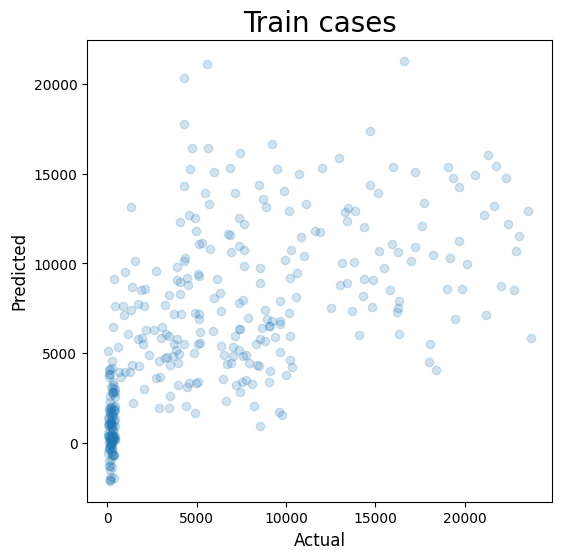

In [ ]:
for i in range(1):
    fig,ax = plt.subplots(figsize=(6,6))
    ax.set_title('Train '+target[i],fontsize=20)
    ax.set_ylabel('Predicted',fontsize=12)
    ax.set_xlabel('Actual',fontsize=12)
    ax.scatter(y,oof,alpha=0.2)

Visualize Importance

In [ ]:
def visualize_importance(models, feat_train_df):

    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df],
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    print(list(order[0:10]))
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')

    ax.tick_params(axis='x', rotation=0)
    #ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()

    return fig,ax

In [ ]:
for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi=ydf.iloc[:,i]
    y=np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))
    oof, models = fit_lgbm(train_feat_df.values, y, cv, params=params, verbose=500)

<ipython-input-105-200a2e69105a>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  oof_pred = np.zeros_like(y, dtype=np.float)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there ar

['cloudcover', 'conditions', 'dew', 'visibility', 'humidity', 'feelslike', 'winddir', 'tempmin', 'windspeed', 'sealevelpressure']


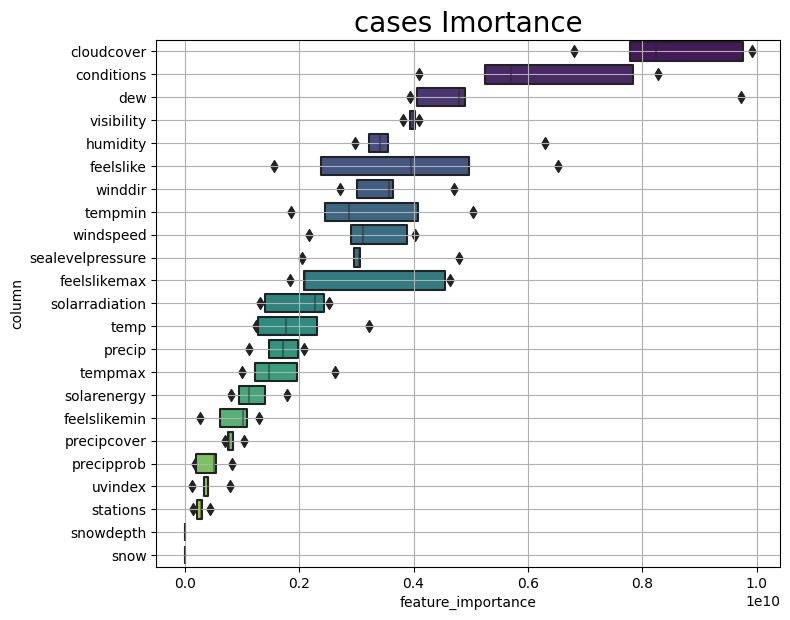

In [ ]:
for i in range(1):
    fig, ax = visualize_importance(models, train_feat_df)
    ax.set_title(target[i]+' Imortance',fontsize=20)

In [ ]:
test_feat_df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations
361,-1.396037,-1.866826,-1.540476,-1.503651,-1.464115,-1.431787,-0.931935,0.494249,-0.461357,-1.530185,...,-0.913831,1.016734,0.196210,0.072005,-1.076154,-1.107602,-1.102655,-1.065370,-0.669485,0.144193
362,-0.993835,-1.683384,-1.830883,-1.189345,-1.344364,-1.581710,-1.081984,0.696408,-0.461357,-1.530185,...,-1.114439,1.119755,0.184112,0.542812,-1.499708,-0.425320,-0.439151,-0.497982,-0.669485,-0.883803
363,1.858147,1.104940,1.819946,0.989837,1.266212,1.116901,-0.481788,-2.421098,-0.461357,-1.530185,...,0.925075,0.553140,-0.091712,-0.038491,1.412223,-0.164611,-0.182311,0.069406,-1.478310,4.256178
364,2.223786,1.215006,1.736973,0.801254,1.122510,1.266824,-0.181690,-1.984860,-0.461357,-1.530185,...,2.106433,0.571537,-0.033644,0.389079,1.253390,-0.989266,-0.931428,-1.065370,-1.478310,4.256178
365,2.223786,1.655267,1.819946,1.304143,1.841017,1.523835,0.080895,-1.803981,-0.461357,-1.530185,...,1.850100,0.291909,0.055878,-0.485277,1.676944,-0.791423,-0.824411,-1.065370,-1.478310,2.200185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0.139645,-0.069091,0.284939,-0.539781,-0.290553,-0.061064,-0.256715,-0.665506,-0.461357,-1.530185,...,-0.055675,-0.388765,0.101849,-0.446843,-0.281991,0.974374,0.994874,1.204182,-0.669485,0.144193
598,0.285901,0.664678,0.616832,-0.455967,0.188451,0.217364,-0.519300,-1.357103,-0.461357,-1.530185,...,-0.111399,0.508988,0.138141,-0.442039,-0.281991,0.793172,0.780840,0.636794,-0.669485,0.144193
599,0.395592,0.627990,0.824266,0.424088,0.164501,0.645715,-0.031641,-1.080464,-0.461357,-1.530185,...,0.156078,1.875242,0.147820,-1.402870,-0.281991,-0.083255,-0.075294,0.636794,-0.669485,0.144193
600,1.163433,0.811432,1.156159,0.926976,0.835108,0.774221,-0.256715,-1.633742,-0.461357,-1.530185,...,-0.323152,-1.351520,0.121205,-1.297178,-0.176103,-0.225628,-0.267924,0.069406,-0.669485,0.144193


In [ ]:
preds=[]
for i in range(5):
    preds += [models[i].predict(test_feat_df.values)/5]
predsT=np.array(preds).T
print(predsT.shape)
preds2=[]
for item in predsT:
    preds2+=[sum(item)]

(241, 5)


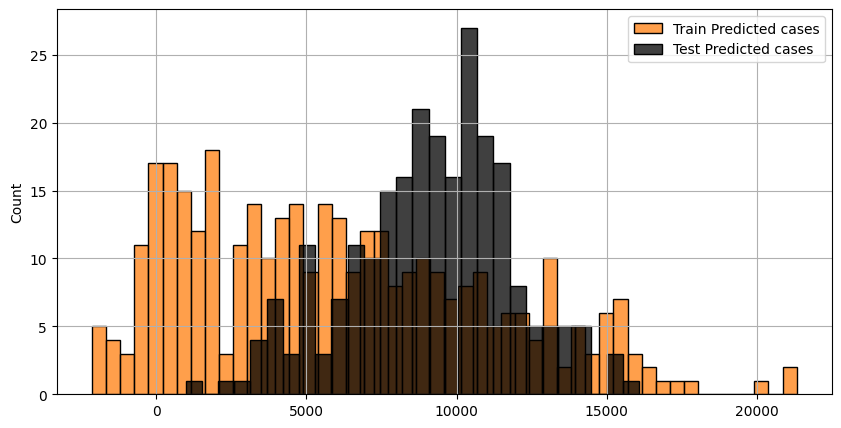

In [ ]:
for i in range(1):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.histplot(oof, label='Train Predicted '+target[i], ax=ax, color='C1',bins=50)
    sns.histplot(preds2, label='Test Predicted '+target[i], ax=ax, color='black',bins=28)
    ax.legend()
    ax.grid()

In [ ]:
items=['conditions','cloudcover','tempmin']

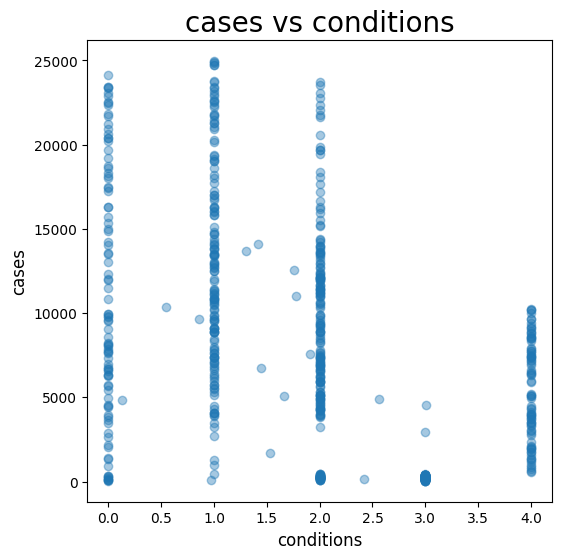

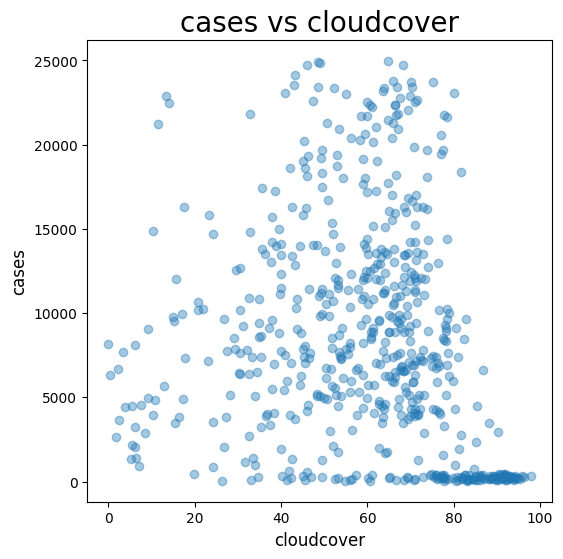

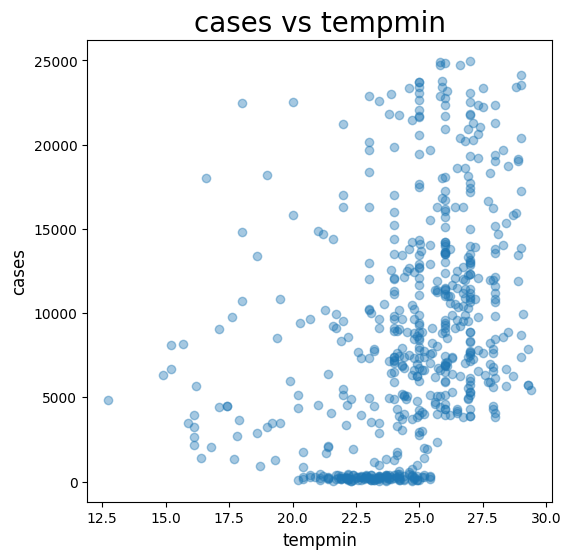

In [ ]:
for i in range(len(items)):
    item=items[i]
    fig,ax = plt.subplots(figsize=(6,6))
    ax.set_title('cases vs '+item,fontsize=20)
    ax.set_xlabel(item ,fontsize=12)
    ax.set_ylabel('cases',fontsize=12)
    ax.scatter(data[item],data['cases'],alpha=0.4)